In [34]:
import numpy as np
import os


input_dir = '/data/disk1/share/mnardon/nextmagDATA/DATASETS/lego/seq1_ALL'

# Load the data
list_of_files = os.listdir(input_dir)
npy_files = [f for f in list_of_files if f.endswith('.npy')]
npy_files.sort()
print(npy_files[:2])

depth_images = [f for f in list_of_files if f.endswith('.png') and f.startswith('depth')]
depth_images.sort()


['depth0_0.npy', 'depth0_1.npy']


In [35]:
first_npy = np.load(os.path.join(input_dir, npy_files[1]))
print(f'{first_npy.shape}') 
print(f'Min: {np.min(first_npy)}, Max: {np.max(first_npy)}')
print(f'Mean: {np.mean(first_npy)}, Std: {np.std(first_npy)}')
print(f'Median: {np.median(first_npy)}')
print(f'{first_npy[400:410,400:410]}')

(720, 1280)
Min: 0, Max: 20953
Mean: 746.7435481770833, Std: 407.89172695008193
Median: 704.0
[[702 703 703 703 703 702 702 702 702 701]
 [701 701 701 701 701 701 701 701 701 700]
 [700 700 700 700 700 700 700 700 700 699]
 [699 699 699 699 699 699 699 699 698 698]
 [698 698 698 698 698 698 698 698 697 697]
 [696 696 696 696 696 696 696 696 696 696]
 [694 694 695 695 695 695 695 695 695 695]
 [692 693 693 693 693 693 693 693 693 693]
 [691 691 691 691 692 692 692 692 692 692]
 [689 689 690 690 690 690 690 690 690 690]]


Depth maps (annotated and raw Velodyne scans) are saved as uint16 PNG images, which can be opened with either MATLAB, libpng++ or the latest version of Python's pillow (from PIL import Image). A 0 value indicates an invalid pixel (ie, no ground truth exists, or the estimation algorithm didn't produce an estimate for that pixel). Otherwise, the depth for a pixel can be computed in meters by converting the uint16 value to float and dividing it by 256.0:

```python

disp(u,v)  = ((float)I(u,v))/256.0;
valid(u,v) = I(u,v)>0;

```


In [4]:
disp(u,v)  = ((float)I(u,v))/256.0;
valid(u,v) = I(u,v)>0;

In [40]:
import numpy as np
import os
import png
import cv2

def save_depth_image_as_uint16(depth_data_mm, output_depth_dir, depth_image_file_name):
    """
    Converts a depth map in millimeters to a uint16 PNG image and saves it.
    The depth values in millimeters are first converted to meters, and then scaled by 256.0 before saving.

    Parameters:
    - depth_data_mm: np.array, the input depth map with float32 values in millimeters.
    - output_depth_dir: str, the directory where the output image should be saved.
    - depth_image_file_name: str, the name of the output PNG file.

    Returns:
    - None
    """
    # Convert millimeters to meters and then scale by 256
    depth_image = (depth_data_mm / 1000.0 * 256.0).astype(np.uint16)
    
    # Construct the file path
    file_path = os.path.join(output_depth_dir, depth_image_file_name)
    
    # Save the uint16 image using pypng
    with open(file_path, 'wb') as f:
        writer = png.Writer(width=depth_image.shape[1],
                            height=depth_image.shape[0],
                            bitdepth=16,
                            greyscale=True)
        writer.write(f, depth_image)

# Example usage:
# save_depth_image_as_uint16(depth_data_mm, '/path/to/output', 'depth_image.png')


In [38]:
save_depth_image_as_uint16(first_npy, 'tmp', 'depth_image.png')

In [39]:

def save_depth_as_npy_from_uint16(depth_data_mm, output_depth_dir, depth_image_file_name):
    """
    Converts a depth map in uint16 PNG format to a numpy array in millimeters and saves it.
    The depth values are first scaled by 1000.0 and then converted to millimeters before saving.
    
    Parameters:
    - depth_data_mm: np.array, the input depth map with uint16 values.
    - output_depth_dir: str, the directory where the output numpy array should be saved.
    - depth_image_file_name: str, the name of the output numpy file.
    
    Returns:
    - None
    """
    # Convert uint16 to millimeters
    depth_data_mm = depth_data_mm.astype(np.float32) * 1000.0
    
    # Construct the file path
    file_path = os.path.join(output_depth_dir, depth_image_file_name)
    
    # Save the numpy array
    np.save(file_path, depth_data_mm)

In [45]:
 # Load depth projections from uint16 image
depth_image = cv2.imread('tmp/depth_image.png', cv2.IMREAD_ANYDEPTH)


In [46]:
save_depth_as_npy_from_uint16(depth_image, 'tmp', 'depth_image.npy')

In [52]:
test = np.load(os.path.join('tmp', 'depth_image.npy'))
print(f'{test.shape}') 
print(f'Min: {np.min(test)}, Max: {np.max(test)}')
print(f'Mean: {np.mean(test)}, Std: {np.std(test)}')
print(f'Median: {np.median(test)}')
print(f'{test[400:410,400:410]}')

(720, 1280)
Min: 0.0, Max: 5363000.0
Mean: 190730.984375, Std: 104311.8125
Median: 180000.0
[[179000. 179000. 179000. 179000. 179000. 179000. 179000. 179000. 179000.
  179000.]
 [179000. 179000. 179000. 179000. 179000. 179000. 179000. 179000. 179000.
  179000.]
 [179000. 179000. 179000. 179000. 179000. 179000. 179000. 179000. 179000.
  178000.]
 [178000. 178000. 178000. 178000. 178000. 178000. 178000. 178000. 178000.
  178000.]
 [178000. 178000. 178000. 178000. 178000. 178000. 178000. 178000. 178000.
  178000.]
 [178000. 178000. 178000. 178000. 178000. 178000. 178000. 178000. 178000.
  178000.]
 [177000. 177000. 177000. 177000. 177000. 177000. 177000. 177000. 177000.
  177000.]
 [177000. 177000. 177000. 177000. 177000. 177000. 177000. 177000. 177000.
  177000.]
 [176000. 176000. 176000. 176000. 177000. 177000. 177000. 177000. 177000.
  177000.]
 [176000. 176000. 176000. 176000. 176000. 176000. 176000. 176000. 176000.
  176000.]]


In [51]:
import cv2

 # Load depth projections from uint16 image
depth_image = cv2.imread('tmp/tmp/depth0_5.png', cv2.IMREAD_ANYDEPTH)
depth_image = np.float32(depth_image / 256.0)

print(f'{depth_image.shape}')
print(f'Min: {np.min(depth_image)}, Max: {np.max(depth_image)}')
print(f'Mean: {np.mean(depth_image)}, Std: {np.std(depth_image)}')
print(f'Median: {np.median(depth_image)}')
print(f'{depth_image[400:410,400:410]}')

import matplotlib.pyplot as plt

plt.imshow(depth_image, cmap='gray')

[ WARN:0@3483.553] global loadsave.cpp:241 findDecoder imread_('tmp/tmp/depth0_5.png'): can't open/read file: check file path/integrity


TypeError: unsupported operand type(s) for /: 'NoneType' and 'float'

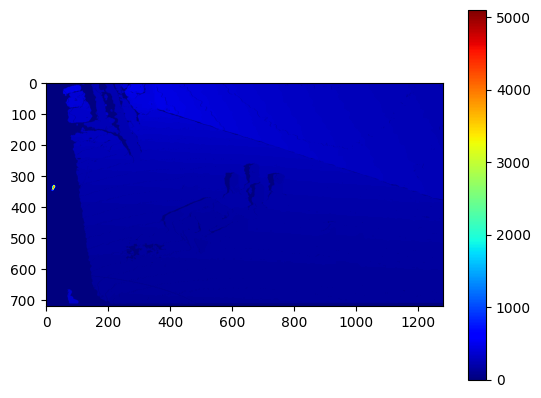

In [33]:
#convert map to better visualize
plt.imshow(depth_image, cmap='jet')
plt.colorbar()

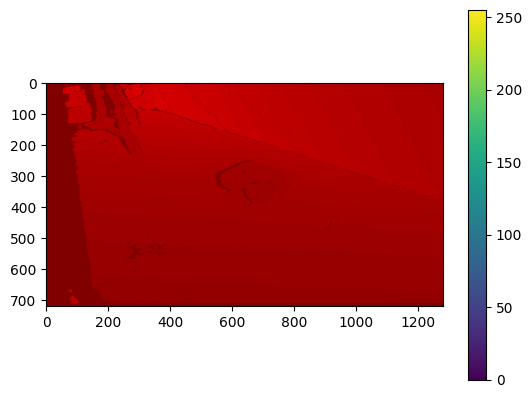

In [27]:
image_jet = cv2.applyColorMap(
                    np.uint8(projected_depths / np.amax(projected_depths) * 255),
                    cv2.COLORMAP_JET)
plt.imshow(image_jet)
plt.colorbar()

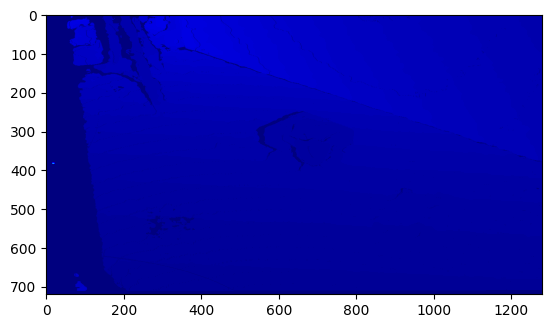

In [26]:
# convert to meters
projected_depths_m = projected_depths * 1000.0
# plot
plt.imshow(projected_depths_m, cmap='jet')

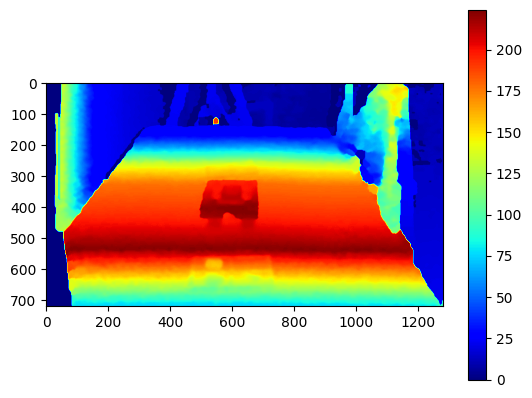

In [50]:
image = cv2.imread('output_tmp/depth1_11.png', cv2.IMREAD_ANYDEPTH)
plt.imshow(image, cmap='jet')
plt.colorbar()


(720, 1280)
Min: 0, Max: 20953
Mean: 746.7435481770833, Std: 407.89172695008193
Median: 704.0
[[702 703 703 703 703 702 702 702 702 701]
 [701 701 701 701 701 701 701 701 701 700]
 [700 700 700 700 700 700 700 700 700 699]
 [699 699 699 699 699 699 699 699 698 698]
 [698 698 698 698 698 698 698 698 697 697]
 [696 696 696 696 696 696 696 696 696 696]
 [694 694 695 695 695 695 695 695 695 695]
 [692 693 693 693 693 693 693 693 693 693]
 [691 691 691 691 692 692 692 692 692 692]
 [689 689 690 690 690 690 690 690 690 690]]
(720, 1280)
Min: 0.0, Max: 875.0
Mean: 420.7432556152344, Std: 300.52490234375
Median: 433.59375
[[742.1875  742.1875  742.1875  742.1875  742.1875  742.1875  742.1875
  742.1875  742.1875  742.1875 ]
 [742.1875  742.1875  742.1875  742.1875  742.1875  742.1875  742.1875
  742.1875  742.1875  742.1875 ]
 [742.1875  742.1875  742.1875  742.1875  742.1875  742.1875  742.1875
  742.1875  746.09375 746.09375]
 [746.09375 746.09375 746.09375 746.09375 746.09375 746.09375 746.

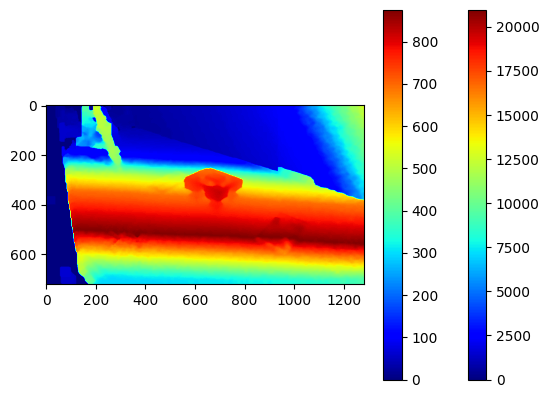

In [57]:
# load two npy files and compare them and plot them
import numpy as np

npy1 = np.load('/data/disk1/share/mnardon/nextmagDATA/DATASETS/lego/seq1_ALL/depth0_1.npy')
npy2 = np.load('tmp/tmp_npy/depth0_1.npy')

print(f'{npy1.shape}')
print(f'Min: {np.min(npy1)}, Max: {np.max(npy1)}')
print(f'Mean: {np.mean(npy1)}, Std: {np.std(npy1)}')
print(f'Median: {np.median(npy1)}')
print(f'{npy1[400:410,400:410]}')

print(f'{npy2.shape}')
print(f'Min: {np.min(npy2)}, Max: {np.max(npy2)}')
print(f'Mean: {np.mean(npy2)}, Std: {np.std(npy2)}')
print(f'Median: {np.median(npy2)}')
print(f'{npy2[400:410,400:410]}')

import matplotlib.pyplot as plt

plt.imshow(npy1, cmap='jet')
plt.colorbar()

plt.imshow(npy2, cmap='jet')
plt.colorbar()



In [60]:
# load npy file
import numpy as np

npy = np.load('/data/disk1/share/mnardon/nextmagDATA/DATASETS/BG_real_depth/d0_19_42:53.493117.npy')

print(f'{npy.shape}')
print(f'Min: {np.min(npy)}, Max: {np.max(npy)}')
print(f'Mean: {np.mean(npy)}, Std: {np.std(npy)}')
print(f'Median: {np.median(npy)}')
print(f'{npy[400:410,400:410]}')


(720, 1280)
Min: 0.0, Max: 3.8930001258850098
Mean: 1.236091136932373, Std: 0.40241292119026184
Median: 1.2350000143051147
[[1.235     1.235     1.235     1.235     1.235     1.235     1.235
  1.235     1.235     1.235    ]
 [1.235     1.235     1.235     1.235     1.235     1.235     1.235
  1.235     1.235     1.235    ]
 [1.235     1.235     1.235     1.235     1.235     1.235     1.235
  1.235     1.235     1.235    ]
 [1.235     1.235     1.235     1.235     1.235     1.235     1.235
  1.235     1.235     1.235    ]
 [1.235     1.235     1.235     1.235     1.235     1.235     1.235
  1.235     1.235     1.235    ]
 [1.235     1.235     1.235     1.235     1.235     1.235     1.235
  1.235     1.235     1.235    ]
 [1.235     1.235     1.235     1.235     1.235     1.235     1.235
  1.235     1.235     1.235    ]
 [1.235     1.235     1.235     1.235     1.235     1.235     1.235
  1.235     1.235     1.235    ]
 [1.2340001 1.2340001 1.2340001 1.2340001 1.2340001 1.2340001 1.23400

In [62]:
npy = np.load('/data/disk1/share/mnardon/nextmagDATA/DATASETS/lego/seq1_ALL/depth0_7.npy')
print(f'{npy.shape}')
print(f'Min: {np.min(npy)}, Max: {np.max(npy)}')
print(f'Mean: {np.mean(npy)}, Std: {np.std(npy)}')
print(f'Median: {np.median(npy)}')
print(f'{npy[400:410,400:410]}')

(720, 1280)
Min: 0, Max: 21512
Mean: 747.0110036892361, Std: 407.77634936276286
Median: 701.0
[[701 701 701 701 701 701 700 700 700 700]
 [700 700 700 700 699 699 699 699 699 698]
 [698 699 699 698 698 698 698 698 698 697]
 [698 698 697 697 697 697 697 696 696 696]
 [696 696 696 696 696 695 695 695 695 695]
 [695 695 695 695 695 694 694 694 694 693]
 [694 694 693 693 693 693 693 692 692 692]
 [692 692 692 692 692 692 692 691 691 691]
 [691 691 691 691 691 690 690 690 690 690]
 [690 690 690 689 689 689 689 689 689 689]]


__________________________________________________________________________________________________________________________________________________________________________________

Original npy file in millimeters
(720, 1280)
Min: 0, Max: 20953
Mean: 746.7435481770833, Std: 407.89172695008193
Median: 704.0
[[723   0   0   0   0   0   0   0   0   0]
 [723 723   0   0   0   0   0   0   0   0]
 [723 723   0   0   0   0   0   0   0   0]
 [724 724   0   0   0   0   0   0   0   0]
 [724 724   0   0   0   0   0   0   0   0]
 [725 725   0   0   0   0   0   0   0   0]
 [725 725   0   0   0   0   0   0   0   0]
 [726 726   0   0   0   0   0   0   0   0]
 [726 727   0   0   0   0   0   0   0   0]
 [727   0   0   0   0   0   0   0   0   0]]
Loaded uint16 image converted from npy file
(720, 1280)
dtype: uint16
Min: 0, Max: 224
Mean: 107.56245225694444, Std: 76.97484473869018
Median: 110.0
[[179 179 179 179 179 179 179 179 179 179]
 [179 179 179 179 179 179 179 179 179 179]
 [180 180 180 180 179 179 179 179 180 180]
 [180 180 180 180 180 180 180 180 180 180]
 [180 180 180 180 180 180 180 180 180 180]
 [180 180 180 180 180 180 180 180 180 180]
 [181 181 181 181 181 181 180 180 

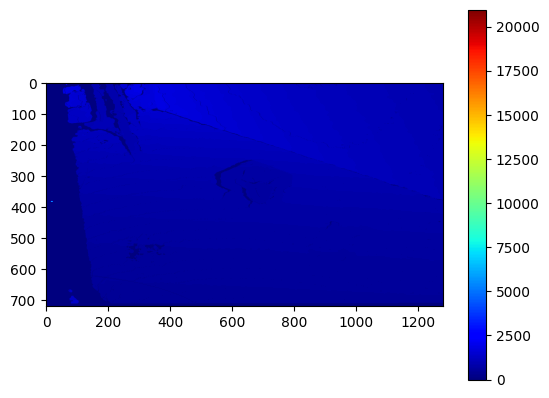

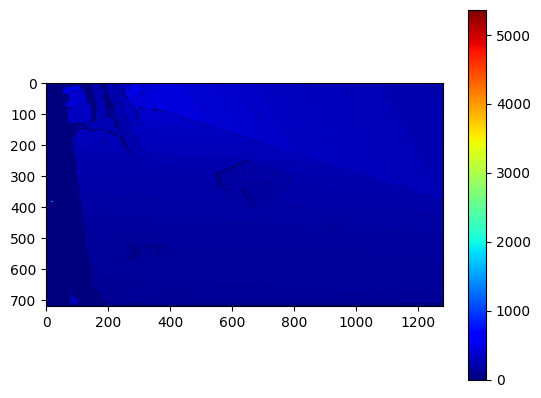

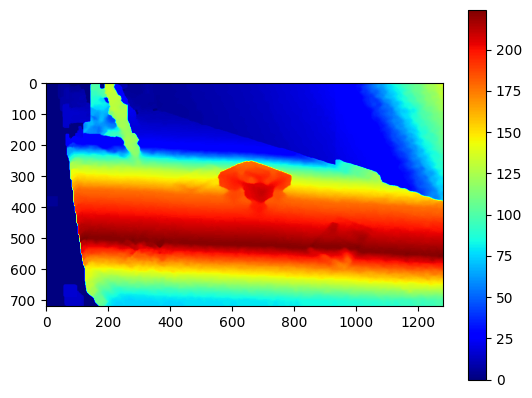

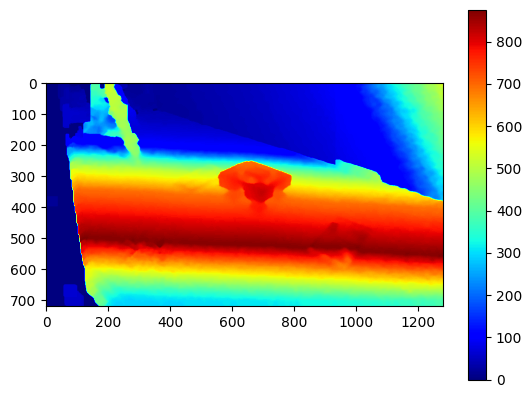

In [33]:
import cv2
import numpy as np
import PIL.Image as Image
import matplotlib.pyplot as plt

print(f'Original npy file in millimeters')
npy = np.load('/data/disk1/share/mnardon/nextmagDATA/DATASETS/lego/seq1_ALL/depth0_1.npy')
shape_npy = npy.shape
print(f'{shape_npy}')
print(f'Min: {np.min(npy)}, Max: {np.max(npy)}')
print(f'Mean: {np.mean(npy)}, Std: {np.std(npy)}')
print(f'Median: {np.median(npy)}')
print(f'{npy[shape_npy[0]//2-5:shape_npy[0]//2+5,shape_npy[1]//2-5:shape_npy[1]//2+5]}')


print(f'Loaded uint16 image converted from npy file')
image_origin = cv2.imread('/home/mnardon/Desktop/GitHub/ip_basic/tmp/tmp_png/depth0_1.png', cv2.IMREAD_ANYDEPTH)
shape_image = image.shape
print(f'{shape_image}')
print(f'dtype: {image.dtype}')
print(f'Min: {np.min(image)}, Max: {np.max(image)}')
print(f'Mean: {np.mean(image)}, Std: {np.std(image)}')
print(f'Median: {np.median(image)}')
print(f'{image[shape_image[0]//2-5:shape_image[0]//2+5,shape_image[1]//2-5:shape_image[1]//2+5]}')


print(f'Loaded unit16 image after fill algorithm')
image = cv2.imread('/home/mnardon/Desktop/GitHub/ip_basic/tmp/output_png/depth0_1.png', cv2.IMREAD_ANYDEPTH)
shape_image = image.shape
print(f'{shape_image}')
print(f'dtype: {image.dtype}')
print(f'Min: {np.min(image)}, Max: {np.max(image)}')
print(f'Mean: {np.mean(image)}, Std: {np.std(image)}')
print(f'Median: {np.median(image)}')
print(f'{image[shape_image[0]//2-5:shape_image[0]//2+5,shape_image[1]//2-5:shape_image[1]//2+5]}')

print(f'Loaded npy file last')
npy_last = np.load('/home/mnardon/Desktop/GitHub/ip_basic/tmp/tmp_npy/depth0_1.npy')
shape_npy = npy_last.shape
print(f'{shape_npy}')
print(f'Min: {np.min(npy_last)}, Max: {np.max(npy_last)}')
print(f'Mean: {np.mean(npy_last)}, Std: {np.std(npy_last)}')
print(f'Median: {np.median(npy_last)}')
print(f'{npy_last[shape_npy[0]//2-5:shape_npy[0]//2+5,shape_npy[1]//2-5:shape_npy[1]//2+5]}')




plt.imshow(npy, cmap='jet')
plt.colorbar()

plt.figure()
plt.imshow(image_origin, cmap='jet')
plt.colorbar()

plt.figure()
plt.imshow(image, cmap='jet')
plt.colorbar()

plt.figure()
plt.imshow(npy_last, cmap='jet')
plt.colorbar()






(720, 1280)
Min: 0, Max: 20953
Mean: 746.7435481770833, Std: 407.89172695008193
Median: 704.0
[[723   0   0   0   0   0   0   0   0   0]
 [723 723   0   0   0   0   0   0   0   0]
 [723 723   0   0   0   0   0   0   0   0]
 [724 724   0   0   0   0   0   0   0   0]
 [724 724   0   0   0   0   0   0   0   0]
 [725 725   0   0   0   0   0   0   0   0]
 [725 725   0   0   0   0   0   0   0   0]
 [726 726   0   0   0   0   0   0   0   0]
 [726 727   0   0   0   0   0   0   0   0]
 [727   0   0   0   0   0   0   0   0   0]]


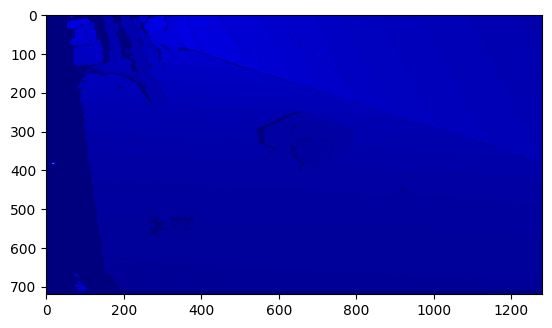

In [38]:
npy_file = '/data/disk1/share/mnardon/nextmagDATA/DATASETS/lego/seq1_ALL/depth0_1.npy'
npy = np.load(npy_file)
npy_shape = npy.shape
print(f'{npy.shape}')
print(f'Min: {np.min(npy)}, Max: {np.max(npy)}')
print(f'Mean: {np.mean(npy)}, Std: {np.std(npy)}')
print(f'Median: {np.median(npy)}')
print(f'{npy[npy_shape[0]//2-5:npy_shape[0]//2+5,npy_shape[1]//2-5:npy_shape[1]//2+5]}')


plt.imshow(npy, cmap='jet')

(720, 1280)
Min: 0.0, Max: 81.84765625
Mean: 2.9169669151306152, Std: 1.5933271646499634
Median: 2.75
[[2.8242188 0.        0.        0.        0.        0.        0.
  0.        0.        0.       ]
 [2.8242188 2.8242188 0.        0.        0.        0.        0.
  0.        0.        0.       ]
 [2.8242188 2.8242188 0.        0.        0.        0.        0.
  0.        0.        0.       ]
 [2.828125  2.828125  0.        0.        0.        0.        0.
  0.        0.        0.       ]
 [2.828125  2.828125  0.        0.        0.        0.        0.
  0.        0.        0.       ]
 [2.8320312 2.8320312 0.        0.        0.        0.        0.
  0.        0.        0.       ]
 [2.8320312 2.8320312 0.        0.        0.        0.        0.
  0.        0.        0.       ]
 [2.8359375 2.8359375 0.        0.        0.        0.        0.
  0.        0.        0.       ]
 [2.8359375 2.8398438 0.        0.        0.        0.        0.
  0.        0.        0.       ]
 [2.8398438 0.  

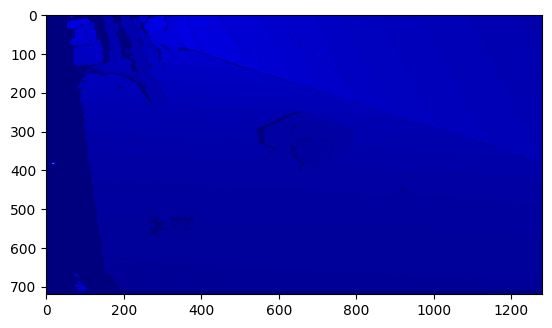

In [39]:
from ip_basic import depth_map_utils
from ip_basic import vis_utils
import numpy as np
import cv2
import matplotlib.pyplot as plt

# depth_image = cv2.imread(depth_image_path, cv2.IMREAD_ANYDEPTH)
# projected_depths = np.float32(depth_image / 256.0)

projected_depths = np.float32(npy / 256.0)
projected_depths_shape = projected_depths.shape
print(f'{projected_depths.shape}')
print(f'Min: {np.min(projected_depths)}, Max: {np.max(projected_depths)}')
print(f'Mean: {np.mean(projected_depths)}, Std: {np.std(projected_depths)}')
print(f'Median: {np.median(projected_depths)}')
print(f'{projected_depths[projected_depths_shape[0]//2-5:projected_depths_shape[0]//2+5,projected_depths_shape[1]//2-5:projected_depths_shape[1]//2+5]}')

plt.imshow(projected_depths, cmap='jet')

(720, 1280)
Min: 0.0, Max: 81.84765625
Mean: 3.1799867153167725, Std: 3.05517315864563
Median: 2.828125
[[2.8242111 2.8242111 2.8242111 2.8242111 2.8242111 2.7795486 2.719551
  2.6397247 2.587906  2.5736847]
 [2.8242111 2.8242111 2.8242111 2.8242111 2.8244553 2.8112335 2.7593231
  2.679779  2.6054153 2.5744553]
 [2.8242111 2.8242111 2.8244553 2.8247452 2.8250885 2.8250885 2.794136
  2.7198334 2.639679  2.5876007]
 [2.8242111 2.8247452 2.825325  2.8259735 2.826126  2.826126  2.8126068
  2.7604065 2.6793594 2.6050568]
 [2.8249893 2.8256683 2.8265991 2.82724   2.8278198 2.8278198 2.82724
  2.7953568 2.7204895 2.6256561]
 [2.8256683 2.8272018 2.8282318 2.8290558 2.8293    2.8293    2.8285294
  2.8142395 2.742691  2.6444168]
 [2.8274384 2.828804  2.8305054 2.830841  2.8310776 2.830841  2.8305054
  2.8159027 2.7584915 2.6455917]
 [2.828804  2.831108  2.8321304 2.8329773 2.8332062 2.8332062 2.8323746
  2.8174973 2.759842  2.646698 ]
 [2.831337  2.8327103 2.8344116 2.8350449 2.8358688 2.836166

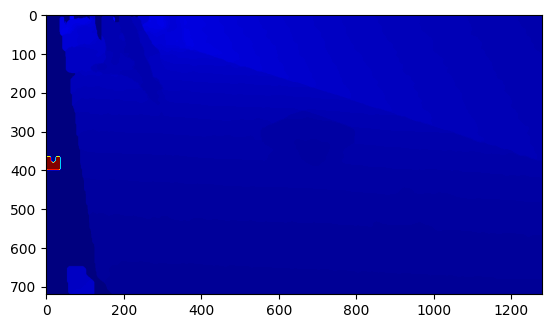

In [41]:
fill_type = 'multiscale'
extrapolate = False
blur_type = 'bilateral'

final_depths, process_dict = depth_map_utils.fill_in_multiscale(
            projected_depths, extrapolate=extrapolate, blur_type=blur_type,
            show_process=False, max_depth=100)

final_depths_shape = final_depths.shape
print(f'{final_depths.shape}')
print(f'Min: {np.min(final_depths)}, Max: {np.max(final_depths)}')
print(f'Mean: {np.mean(final_depths)}, Std: {np.std(final_depths)}')
print(f'Median: {np.median(final_depths)}')
print(f'{final_depths[final_depths_shape[0]//2-5:final_depths_shape[0]//2+5,final_depths_shape[1]//2-5:final_depths_shape[1]//2+5]}')

plt.imshow(final_depths, cmap='jet')


(720, 1280)
Min: 0.0, Max: 20953.0
Mean: 814.0765991210938, Std: 782.1243286132812
Median: 724.0
[[722.99805 722.99805 722.99805 722.99805 722.99805 711.56445 696.2051
  675.76953 662.5039  658.8633 ]
 [722.99805 722.99805 722.99805 722.99805 723.06055 719.6758  706.3867
  686.02344 666.9863  659.06055]
 [722.99805 722.99805 723.06055 723.13477 723.22266 723.22266 715.2988
  696.27734 675.7578  662.4258 ]
 [722.99805 723.13477 723.2832  723.4492  723.4883  723.4883  720.02734
  706.66406 685.916   666.89453]
 [723.19727 723.3711  723.6094  723.77344 723.9219  723.9219  723.77344
  715.6113  696.4453  672.16797]
 [723.3711  723.7637  724.02734 724.2383  724.3008  724.3008  724.1035
  720.4453  702.1289  676.9707 ]
 [723.8242  724.1738  724.6094  724.6953  724.75586 724.6953  724.6094
  720.8711  706.1738  677.2715 ]
 [724.1738  724.7637  725.0254  725.2422  725.3008  725.3008  725.0879
  721.2793  706.51953 677.5547 ]
 [724.82227 725.1738  725.6094  725.7715  725.9824  726.0586  725.834

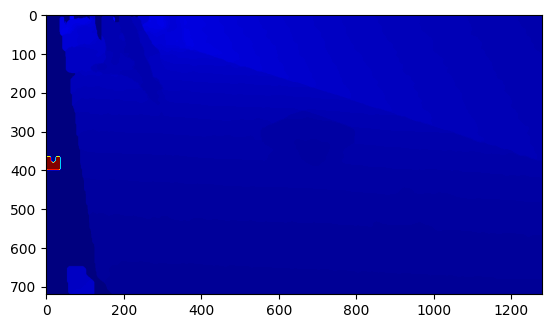

In [42]:
final_depths_after = np.float32(final_depths*256.0)

final_depths_after_shape = final_depths_after.shape
print(f'{final_depths_after.shape}')
print(f'Min: {np.min(final_depths_after)}, Max: {np.max(final_depths_after)}')
print(f'Mean: {np.mean(final_depths_after)}, Std: {np.std(final_depths_after)}')
print(f'Median: {np.median(final_depths_after)}')
print(f'{final_depths_after[final_depths_after_shape[0]//2-5:final_depths_after_shape[0]//2+5,final_depths_after_shape[1]//2-5:final_depths_after_shape[1]//2+5]}')

plt.imshow(final_depths_after, cmap='jet')

In [10]:
import numpy as np  
from matplotlib import pyplot as plt

npy_file = '/data/disk1/share/mnardon/nextmagDATA/DATASETS/Synth07/depth/depth_0.npy'
npy = np.load(npy_file)
npy_shape = npy.shape
print(f'{npy.shape}')
print(f'Min: {np.min(npy)}, Max: {np.max(npy)}')
print(f'Mean: {np.mean(npy)}, Std: {np.std(npy)}')
print(f'Median: {np.median(npy)}')
print(npy.dtype)


plt.imshow(npy, cmap='jet')

ValueError: cannot reshape array of size 131040 into shape (1080,1920,1)

In [39]:
import numpy as np
import png
import os

def convert_and_save_to_png(depth_file, dest, scale=1):
    """
    Convert a NumPy array from a .npy file to uint16 format and save it as a PNG file.

    Parameters:
    depth_file (str): Path to the .npy file.
    dest (str): Destination directory to save the PNG file.
    scale (float, optional): Scaling factor to apply before conversion. Default is 1.
    """
    # Load the .npy file
    npy_array = np.load(depth_file)
    
    # Scale the array
    scaled_array = npy_array * scale

    # Clip values to be within the uint16 range
    clipped_array = np.clip(scaled_array, 0, 65535)

    # Convert the array to uint16
    uint16_array = clipped_array.astype(np.uint16)

    # Construct the output file path
    output_file = os.path.join(dest, os.path.basename(depth_file).replace('.npy', '.png'))

    # Save the array as a PNG file
    with open(output_file, 'wb') as f:
        writer = png.Writer(width=uint16_array.shape[1],
                            height=uint16_array.shape[0],
                            bitdepth=16,
                            greyscale=True)
        # pypng requires the data to be provided as a list of rows
        writer.write(f, uint16_array)

    print(f"Saved PNG file: {output_file}")

# Example usage:
depth_file = '/data/disk1/share/mnardon/nextmagDATA/DATASETS/Synth07/depth/depth/depth_0.npy'
dest = 'tmp/'  # Make sure this directory exists
convert_and_save_to_png(depth_file, dest, scale=10)


TypeError: only integer scalar arrays can be converted to a scalar index

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import png

synth_file = '/data/disk1/share/mnardon/nextmagDATA/DATASETS/Synth07/depth/depth/depth_0.npy'
synth = np.load(synth_file)
synth *= 10
print(synth.shape)
print(f'Min: {np.min(synth)}, Max: {np.max(synth)}')
print(f'Mean: {np.mean(synth)}, Std: {np.std(synth)}')
print(f'Median: {np.median(synth)}')
# print(synth[400:410,400:410])

print(synth.dtype)

# save the image as a png

convert_to_png_uint16(synth_file, 'tmp/', scale=10)


(1080, 1920, 1)
Min: 141.62486267089844, Max: 164.3021240234375
Mean: 152.20681762695312, Std: 6.6346869468688965
Median: 151.77891540527344
float32
Shape: (1080, 1920, 1)
Min: 141, Max: 164
Mean: 151.70679108796296, Std: 6.644132110130338
Median: 151.0
Error writing PNG file for /data/disk1/share/mnardon/nextmagDATA/DATASETS/Synth07/depth/depth/depth_0.npy: required argument is not an integer


In [18]:
image = cv2.imread('tmp/depth_0.png')
image.dtype


dtype('uint8')